In [44]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [45]:
! kaggle datasets download mujtabamatin/air-quality-and-pollution-assessment

Dataset URL: https://www.kaggle.com/datasets/mujtabamatin/air-quality-and-pollution-assessment
License(s): apache-2.0
air-quality-and-pollution-assessment.zip: Skipping, found more recently modified local copy (use --force to force download)


In [46]:
import zipfile
zip_ref =  zipfile.ZipFile(r'/content/air-quality-and-pollution-assessment.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

### Import Libraries:

In [47]:
# Basic Libraries
import numpy as np
import pandas as pd

# Data Visualizaion libraries
import matplotlib.pyplot as plt
import seaborn as sns

# ML libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV

# Warning text elimination
import warnings
warnings.filterwarnings('ignore')

### Helping Functions:

In [48]:
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_fscore_support,roc_curve, auc, accuracy_score

# Model Evaluation
def model_evaluation(yt, yp):
    results = {}
    results['accuracy'] = accuracy_score(yt, yp)

    precision, recall, fscore, _ = precision_recall_fscore_support(yt, yp, average = 'weighted')
    results['precision'] = precision
    results['recall'] = recall
    results['fscore'] = fscore

    metrics = list(results.keys())
    values = list(results.values())

    ax = sns.barplot(x = metrics, y = values, palette = 'viridis')
    plt.title('Model Evaluation Metrics')
    plt.ylim(0,1)
    plt.ylabel('Value')

    for i, v in enumerate(values):
        plt.text(i, v/2, f'{v: 0.2f}', ha = 'center', va = 'center', color = 'white',
                fontsize = 12)
    plt.show()

# Classification Report
def class_report(yt, yp):
    cr = pd.DataFrame(classification_report(yt, yp, output_dict = True))
    return cr.T.style.background_gradient(cmap = 'Blues', axis = 0)

# Confusion Matrix
def conf_matrix(yt, yp):
    cm = confusion_matrix(yt, yp)
    sns.heatmap(cm, annot = True, linecolor = 'black', fmt = '0.2f', cmap = 'Blues',
               linewidths = 0.01)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Class')
    plt.ylabel('Actual Class')
    plt.show()

def plot_roc(yt, yp):
    fpr, tpr, thr = roc_curve(yt, yp)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize = (6,6))
    plt.plot(fpr, tpr, color = 'darkorange', lw=2,
            label = f"ROC_CURVE (Area = {roc_auc : 0.3f})")
    plt.plot([0.0, 1.0], [0.0, 1.0], lw=2, color = 'navy', linestyle = '--')
    plt.xlim([-0.01, 1.05])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc = 'lower right')
    plt.show()

In [49]:
df = pd.read_csv(r'/content/updated_pollution_dataset.csv')
df.head()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good


In [50]:
# Data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature                    5000 non-null   float64
 1   Humidity                       5000 non-null   float64
 2   PM2.5                          5000 non-null   float64
 3   PM10                           5000 non-null   float64
 4   NO2                            5000 non-null   float64
 5   SO2                            5000 non-null   float64
 6   CO                             5000 non-null   float64
 7   Proximity_to_Industrial_Areas  5000 non-null   float64
 8   Population_Density             5000 non-null   int64  
 9   Air Quality                    5000 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 390.8+ KB


In [51]:
# Finding the null values
df.isnull().sum()

,0
Temperature,0
Humidity,0
PM2.5,0
PM10,0
NO2,0
SO2,0
CO,0
Proximity_to_Industrial_Areas,0
Population_Density,0
Air Quality,0


In [52]:
# Find Duplicated values
df.duplicated().sum()

0

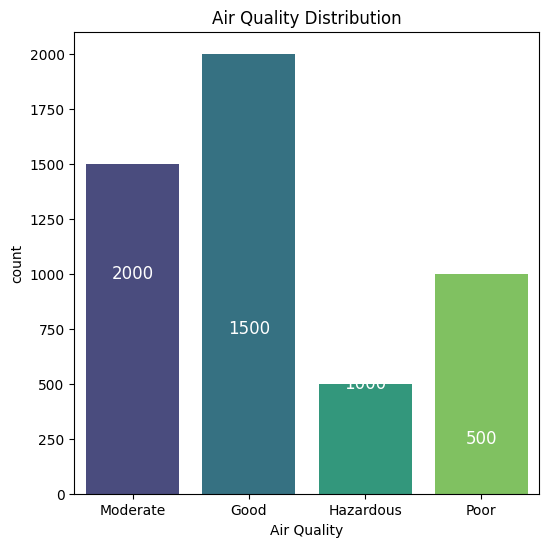

In [53]:
# Air Quality Distribution
plt.figure(figsize = (6,6))
sns.countplot(data = df, x = 'Air Quality', hue = 'Air Quality', palette = 'viridis')
for i, v in enumerate(list(df['Air Quality'].value_counts())):
  plt.text(i, v/2 , f'{v}', ha = 'center', va = 'center', color = 'white', fontsize = 12)
plt.title('Air Quality Distribution')
plt.show()

### Data Preprocessing:

In [54]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Air Quality'] = label_encoder.fit_transform(df['Air Quality'])

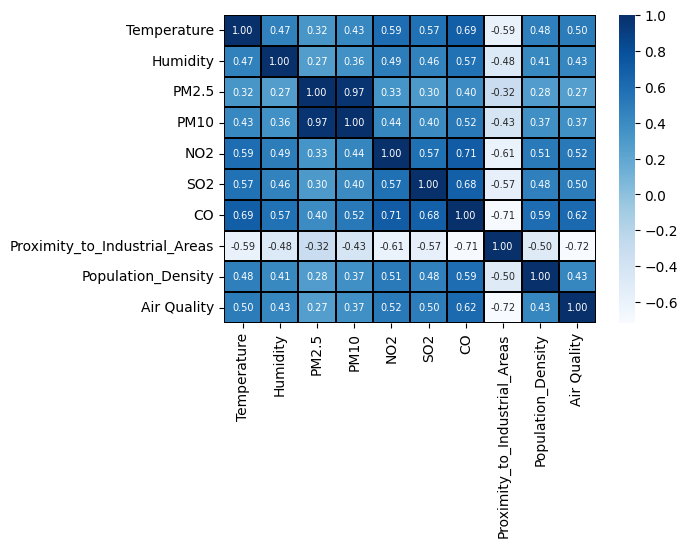

In [55]:
# Correlation Matrix:
plt.figure(figsize = (6,4))
corr = df.corr()
sns.heatmap(corr, annot = True, cmap = 'Blues', linewidths = 0.01, linecolor = 'black',
           fmt = '0.2f', annot_kws = {'fontsize' : 7})
plt.xticks(fontsize = 10, rotation = 90)
plt.yticks(fontsize = 10, rotation = 0)
plt.show()

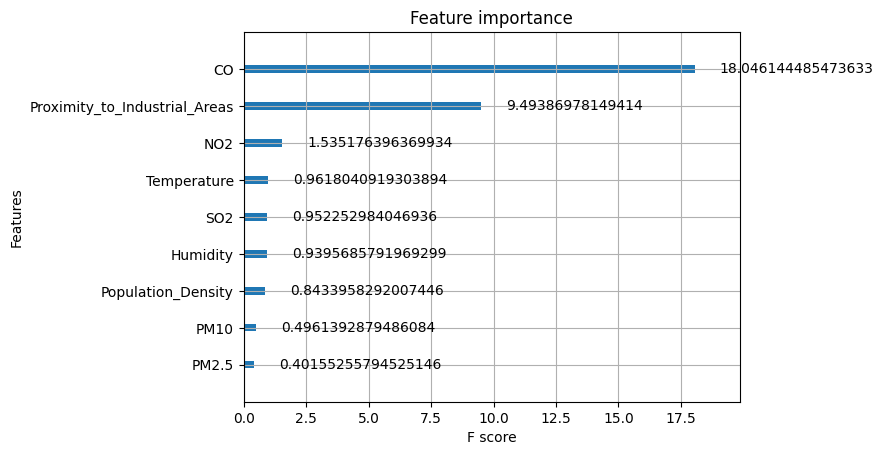

In [56]:
# Finding important variables
import xgboost as xgb
from xgboost import plot_importance

# Assuming you have your data ready in X (features) and y (target)
model = xgb.XGBClassifier()  # or XGBRegressor for regression tasks
model.fit(df.drop('Air Quality', axis = 1), df['Air Quality'])

# Plot feature importance
plot_importance(model, importance_type='gain')  # You can choose 'gain', 'weight', or 'cover'
plt.show()

In [57]:
# Extract the Features PM10 and PM2.5
df_extracted = df.drop(['PM2.5', 'PM10'], axis = 1)
df_extracted.columns

Index(['Temperature', 'Humidity', 'NO2', 'SO2', 'CO',
       'Proximity_to_Industrial_Areas', 'Population_Density', 'Air Quality'],
      dtype='object')

In [58]:
# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(df.drop(['Air Quality'], axis = 1), df['Air Quality'], test_size = 0.2, random_state = 42)
print(X_train.shape)
print(y_train.shape)

(4000, 9)
(4000,)


In [59]:
# Create train and test sets for extreacted features
X_train_ext, X_test_ext, y_train_ext, y_test_ext = train_test_split(df_extracted.drop(['Air Quality'], axis = 1), df_extracted['Air Quality'], test_size = 0.2, random_state = 42)
print(X_train_ext.shape)
print(y_train_ext.shape)

(4000, 7)
(4000,)


In [60]:
# Scaling to z-scores
std_scaler = StandardScaler()

X_train_scaled = std_scaler.fit_transform(X_train)
X_test_scaled = std_scaler.transform(X_test)

print(f"X_train_scaled: {X_train_scaled.shape}")
print(f"X_test_scaled: {X_test_scaled.shape}")


X_train_ext_scaled = std_scaler.fit_transform(X_train_ext)
X_test_ext_scaled = std_scaler.transform(X_test_ext)

print(f"X_train_ext_scaled: {X_train_ext_scaled.shape}")
print(f"X_test_ext_scaled: {X_test_ext_scaled.shape}")

X_train_scaled: (4000, 9)
X_test_scaled: (1000, 9)
X_train_ext_scaled: (4000, 7)
X_test_ext_scaled: (1000, 7)


### Modeling with Feature Extraction:

In [61]:
from xgboost import XGBClassifier

xgb = XGBClassifier()

params_dist = {
    'n_estimators' : [20 * n for n in range(1,21)],
    'max_depth' : [3,4,5],
    'learning_rate' : [0.1, 0.01, 0.001, 0.0001]
}

random_search = RandomizedSearchCV(estimator = xgb, param_distributions = params_dist,
                                  cv=5, scoring = 'accuracy', n_jobs = -1, n_iter = 10)
random_search.fit(X_train_ext_scaled, y_train_ext.values.ravel())

print(f"Best Parameters : {random_search.best_params_}")
print(f"Best Score: {random_search.best_score_}")

Best Parameters : {'n_estimators': 280, 'max_depth': 4, 'learning_rate': 0.1}
Best Score: 0.9525


In [62]:
y_pred = random_search.predict(X_test_ext_scaled)

# Classification Report
class_report(y_test_ext, y_pred)

,precision,recall,f1-score,support
0,1.000000,1.000000,1.000000,409.000000
1,0.925234,0.891892,0.908257,111.000000
2,0.969178,0.962585,0.965870,294.000000
3,0.880208,0.908602,0.894180,186.000000
accuracy,0.960000,0.960000,0.960000,0.960000
macro avg,0.943655,0.940770,0.942077,1000.000000
weighted avg,0.960358,0.960000,0.960100,1000.000000


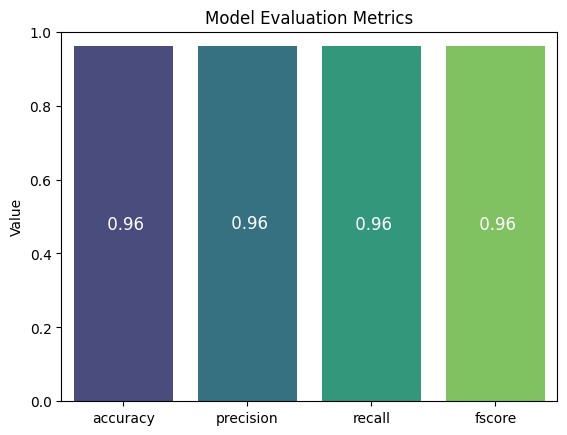

In [63]:
# Model Evaluation
model_evaluation(y_test, y_pred)

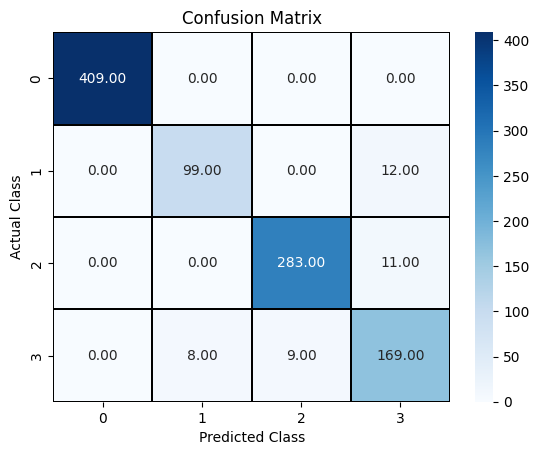

In [64]:
# Confussion matrix
conf_matrix(y_test, y_pred)

### Modeling without Feature Extraction:

In [65]:
from xgboost import XGBClassifier

xgb = XGBClassifier()

params_dist = {
    'n_estimators' : [20 * n for n in range(1,21)],
    'max_depth' : [3,4,5],
    'learning_rate' : [0.1, 0.01, 0.001, 0.0001]
}

random_search = RandomizedSearchCV(estimator = xgb, param_distributions = params_dist,
                                  cv=5, scoring = 'accuracy', n_jobs = -1, n_iter = 10)
random_search.fit(X_train_scaled, y_train.values.ravel())

print(f"Best Parameters : {random_search.best_params_}")
print(f"Best Score: {random_search.best_score_}")

Best Parameters : {'n_estimators': 300, 'max_depth': 3, 'learning_rate': 0.1}
Best Score: 0.9535


In [66]:
y_pred = random_search.predict(X_test_scaled)

# Classification Report
class_report(y_test, y_pred)

,precision,recall,f1-score,support
0,1.000000,1.000000,1.000000,409.000000
1,0.924528,0.882883,0.903226,111.000000
2,0.975694,0.955782,0.965636,294.000000
3,0.868020,0.919355,0.892950,186.000000
accuracy,0.959000,0.959000,0.959000,0.959000
macro avg,0.942061,0.939505,0.940453,1000.000000
weighted avg,0.959929,0.959000,0.959244,1000.000000


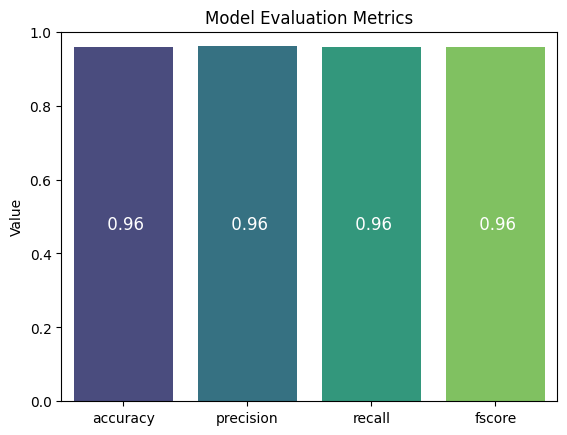

In [67]:
# Model Evaluation
model_evaluation(y_test, y_pred)

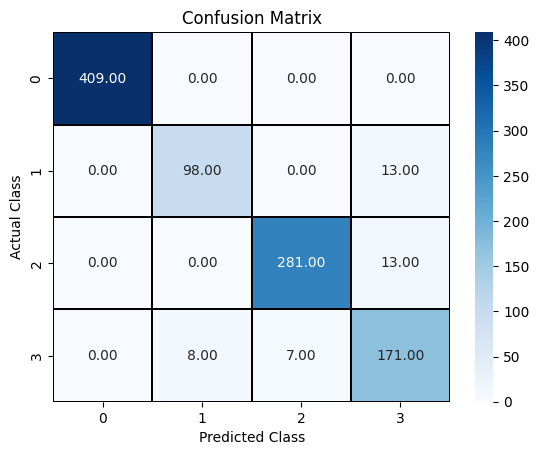

In [68]:
# Confussion matrix
conf_matrix(y_test, y_pred)

### Conclusion:
In this study, the XGBoost model was applied to the Air Quality dataset, and its performance was evaluated with and without feature extraction. The results show that the model performed well in both scenarios, demonstrating the robustness and efficiency of XGBoost in handling raw as well as processed datasets.

However, the use of feature extraction further optimized the model by potentially reducing noise and highlighting the most relevant features, leading to slightly improved results. This highlights the value of feature engineering in refining model performance, even when the base model performs effectively on the original data.